In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy  as np

In [3]:
from sklearn.model_selection import cross_validate as cval
#from sklearn import utils
from sklearn.model_selection import learning_curve, GridSearchCV,RandomizedSearchCV
#from sklearn.grid_s import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC

In [2]:
raw =  pd.read_excel('Instant Raw Report (11).xlsx')

In [6]:
set(raw['CCMS ID'])

{'SMR03-0219-0252'}

In [3]:
raw

,CCMS ID,Timestamp,Active Power kW,Apparent Power kVA,Current R (A),Current Y (A),Current B (A),Voltage R (V),Voltage Y (V),Voltage B (V),...,B Phase kW,Active Mode,Total Active Energy,Total Apparent Energy,Current Day kWh,Current Day kVAh,Power On Time(Hrs),Relay on Time(Hrs),Current Day Meter on Period,Current Day Relay on Period
0,SMR03-0219-0252,2019-05-01 23:44:42,5.11,5.15,10.66,5.47,5.85,233.48,234.57,235.40,...,1.36,AUTO,7329.234,7372.664,49.204,49.591,1615:42:7,791:3:44,22:47:44,9:38:30
1,SMR03-0219-0252,2019-05-01 23:29:04,5.11,5.14,10.65,5.48,5.83,233.56,234.34,235.45,...,1.35,AUTO,7327.901,7371.322,47.871,48.249,1615:26:31,790:48:8,22:32:8,9:22:54
2,SMR03-0219-0252,2019-05-01 23:13:58,5.11,5.14,10.74,5.52,5.89,231.74,232.72,233.72,...,1.35,AUTO,7326.616,7370.028,46.586,46.955,1615:11:25,790:33:2,22:17:2,9:7:48
3,SMR03-0219-0252,2019-05-01 22:57:49,5.12,5.16,10.73,5.53,5.90,232.01,233.22,234.14,...,1.36,AUTO,7325.238,7368.641,45.208,45.568,1614:55:17,790:16:54,22:0:54,8:51:40
4,SMR03-0219-0252,2019-05-01 22:42:12,5.17,5.22,10.79,5.55,5.92,233.17,234.27,235.16,...,1.37,AUTO,7323.899,7367.293,43.869,44.220,1614:39:41,790:1:18,21:45:18,8:36:4
5,SMR03-0219-0252,2019-05-01 21:56:21,5.10,5.14,10.57,5.42,5.79,235.42,236.27,237.33,...,1.35,AUTO,7322.382,7365.765,42.352,42.692,1614:21:47,789:43:24,21:27:24,8:18:10
6,SMR03-0219-0252,2019-05-01 21:40:43,5.11,5.15,10.51,5.38,5.75,237.15,238.32,239.24,...,1.35,AUTO,7321.050,7364.424,41.020,41.351,1614:6:10,789:27:47,21:11:48,8:2:34
7,SMR03-0219-0252,2019-05-01 21:25:06,5.10,5.14,10.52,5.41,5.78,235.95,237.13,237.72,...,1.35,AUTO,7319.720,7363.084,39.690,40.011,1613:50:34,789:12:11,20:56:12,7:46:58
8,SMR03-0219-0252,2019-05-01 21:09:28,5.11,5.15,10.55,5.40,5.78,236.11,237.31,237.91,...,1.35,AUTO,7318.390,7361.745,38.360,38.672,1613:34:57,788:56:34,20:40:34,7:31:20
9,SMR03-0219-0252,2019-05-01 20:53:51,5.11,5.14,10.54,5.42,5.80,235.49,237.19,237.84,...,1.36,AUTO,7317.059,7360.405,37.029,37.332,1613:19:21,788:40:58,20:24:58,7:15:44


In [4]:
raw.describe()

,Active Power kW,Apparent Power kVA,Current R (A),Current Y (A),Current B (A),Voltage R (V),Voltage Y (V),Voltage B (V),Frequency (Hz),MD kVA,MD kW,R Phase kW,Y Phase kW,B Phase kW,Total Active Energy,Total Apparent Energy,Current Day kWh,Current Day kVAh
count,2677.000000,2677.000000,2677.000000,2677.000000,2677.000000,2677.000000,2677.000000,2677.000000,2677.000000,2677.000000,2677.000000,2677.000000,2677.000000,2677.000000,2677.000000,2677.000000,2677.000000,2677.000000
mean,2.168326,2.182518,4.783605,1.353747,3.043582,239.106235,239.375387,239.260362,50.014967,4.027826,4.005151,1.131102,0.315103,0.717826,6554.472007,6592.560025,26.731829,26.926167
std,2.381102,2.396681,5.228688,1.959552,3.338796,8.257170,8.790644,9.200175,0.066142,1.907022,1.895738,1.235374,0.454676,0.788004,448.534381,451.449749,10.722209,10.792976
min,0.000000,0.000000,0.000000,0.000000,0.000000,220.980000,220.210000,219.570000,49.721000,0.000000,0.000000,0.000000,0.000000,0.000000,5743.752000,5776.698000,0.018000,0.031000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,232.330000,231.990000,231.360000,49.983000,1.290000,1.280000,0.000000,0.000000,0.000000,6174.681000,6210.318000,24.067000,24.283000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,238.750000,239.060000,239.000000,50.022000,5.350000,5.320000,0.000000,0.000000,0.000000,6571.720000,6609.643000,27.296000,27.534000
75%,4.580000,4.610000,10.470000,1.370000,6.720000,246.240000,247.150000,247.110000,50.061000,5.350000,5.320000,2.470000,0.310000,1.580000,6940.359000,6980.919000,31.699000,31.909000
max,5.540000,5.570000,11.520000,5.640000,7.900000,257.190000,258.940000,259.490000,50.327000,5.350000,5.320000,2.690000,1.290000,1.870000,7329.234000,7372.664000,59.054000,59.439000


In [5]:
correlation = raw.corr()

In [6]:
correlation

,Active Power kW,Apparent Power kVA,Current R (A),Current Y (A),Current B (A),Voltage R (V),Voltage Y (V),Voltage B (V),Frequency (Hz),MD kVA,MD kW,R Phase kW,Y Phase kW,B Phase kW,Total Active Energy,Total Apparent Energy,Current Day kWh,Current Day kVAh
Active Power kW,1.000000,0.999998,0.993764,0.817536,0.987857,-0.129301,-0.083290,-0.091685,-0.139344,-0.096421,-0.096490,0.993241,0.819666,0.985737,-0.072571,-0.072556,-0.057890,-0.058059
Apparent Power kVA,0.999998,1.000000,0.993715,0.817657,0.987764,-0.128841,-0.082816,-0.091193,-0.139229,-0.096147,-0.096216,0.993224,0.819813,0.985677,-0.072155,-0.072139,-0.057991,-0.058157
Current R (A),0.993764,0.993715,1.000000,0.759427,0.994444,-0.137206,-0.087744,-0.097607,-0.149866,-0.066104,-0.066168,0.998992,0.760689,0.991844,-0.063613,-0.063611,-0.053309,-0.053523
Current Y (A),0.817536,0.817657,0.759427,1.000000,0.728258,-0.245521,-0.221402,-0.216000,-0.093517,-0.310383,-0.310503,0.748917,0.999477,0.715409,-0.152726,-0.152611,0.046666,0.046666
Current B (A),0.987857,0.987764,0.994444,0.728258,1.000000,-0.117920,-0.070956,-0.083455,-0.149469,-0.059447,-0.059491,0.994575,0.729494,0.998874,-0.078721,-0.078734,-0.069285,-0.069545
Voltage R (V),-0.129301,-0.128841,-0.137206,-0.245521,-0.117920,1.000000,0.995499,0.992612,0.215587,0.670413,0.670411,-0.108476,-0.229771,-0.087518,0.627676,0.627563,-0.324179,-0.323081
Voltage Y (V),-0.083290,-0.082816,-0.087744,-0.221402,-0.070956,0.995499,1.000000,0.998705,0.206251,0.692401,0.692392,-0.058901,-0.205506,-0.040483,0.667338,0.667233,-0.312210,-0.311039
Voltage B (V),-0.091685,-0.091193,-0.097607,-0.216000,-0.083455,0.992612,0.998705,1.000000,0.208168,0.693498,0.693482,-0.068950,-0.200012,-0.053175,0.685660,0.685564,-0.300671,-0.299445
Frequency (Hz),-0.139344,-0.139229,-0.149866,-0.093517,-0.149469,0.215587,0.206251,0.208168,1.000000,0.107573,0.107639,-0.143917,-0.089093,-0.143125,0.196352,0.196372,-0.117781,-0.117567
MD kVA,-0.096421,-0.096147,-0.066104,-0.310383,-0.059447,0.670413,0.692401,0.693498,0.107573,1.000000,0.999999,-0.049037,-0.299479,-0.041480,0.816351,0.816196,-0.157139,-0.156278


In [7]:
import seaborn as sns

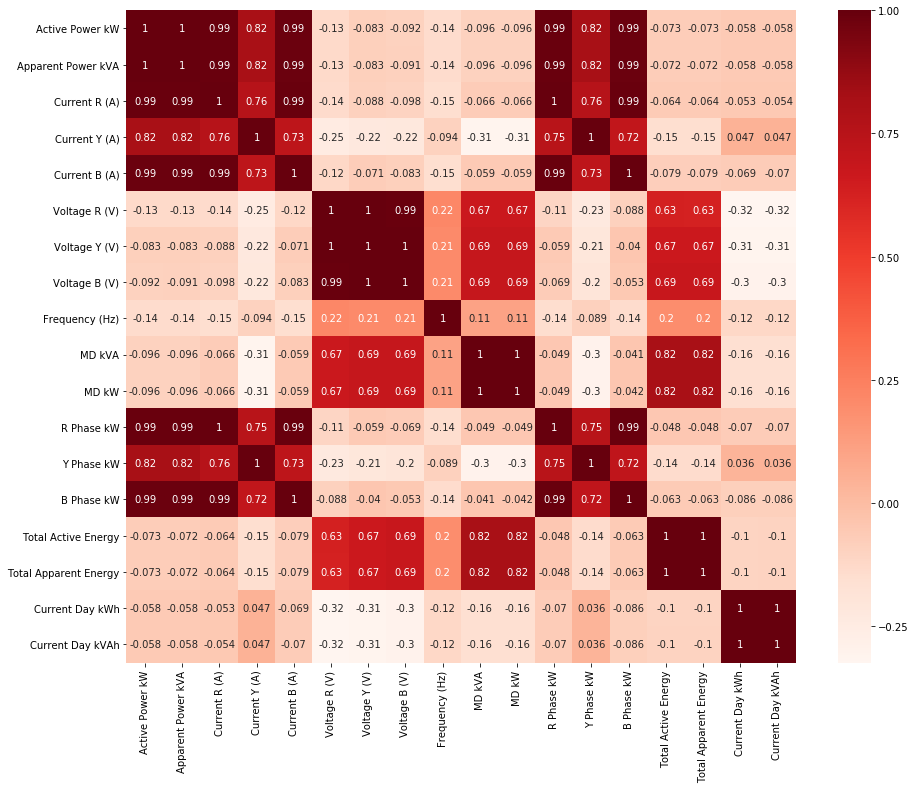

In [8]:
plt.figure(figsize=(15,12))
sns.heatmap(correlation,annot=True, cmap=plt.cm.Reds)
plt.show()

In [9]:
#Correlation with output variable
cor_target = abs(correlation['Active Power kW'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features


Active Power kW       1.000000
Apparent Power kVA    0.999998
Current R (A)         0.993764
Current Y (A)         0.817536
Current B (A)         0.987857
R Phase kW            0.993241
Y Phase kW            0.819666
B Phase kW            0.985737
Name: Active Power kW, dtype: float64

In [10]:
sorted_active_power = raw.sort_values(['Active Power kW'], ascending=False)
active_power_counts = sorted_active_power['Active Power kW'].values
sorted_apparent_power = raw.sort_values(['Apparent Power kVA'], ascending=False)
apparent_power_counts = sorted_apparent_power['Apparent Power kVA'].values

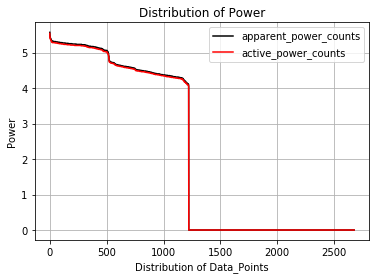

In [13]:
plt.plot(apparent_power_counts, label="apparent_power_counts",color= 'black')
plt.plot(active_power_counts, label="active_power_counts",color = 'red')
plt.title("Distribution of Power")
plt.grid()
plt.xlabel("Distribution of Data_Points")
plt.ylabel("Power")
plt.legend()
plt.show()


In [14]:
sorted_Vr = raw.sort_values(['Voltage R (V)'], ascending=False)
Vr_counts = sorted_Vr['Voltage R (V)'].values
sorted_Vb = raw.sort_values(['Voltage B (V)'], ascending=False)
Vb_counts = sorted_Vb['Voltage B (V)'].values
sorted_Vy = raw.sort_values(['Voltage Y (V)'], ascending=False)
Vy_counts = sorted_Vy['Voltage Y (V)'].values

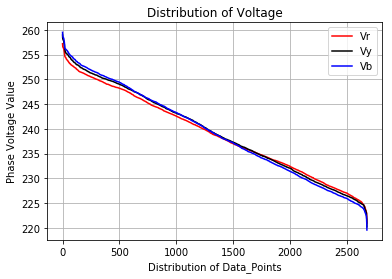

In [15]:
plt.plot(Vr_counts, label="Vr",color = 'red')
plt.plot(Vy_counts, label="Vy",color='black')
plt.plot(Vb_counts, label="Vb",color= 'blue')
plt.title("Distribution of Voltage")
plt.grid()
plt.xlabel("Distribution of Data_Points")
plt.ylabel("Phase Voltage Value")
plt.legend()
plt.show()


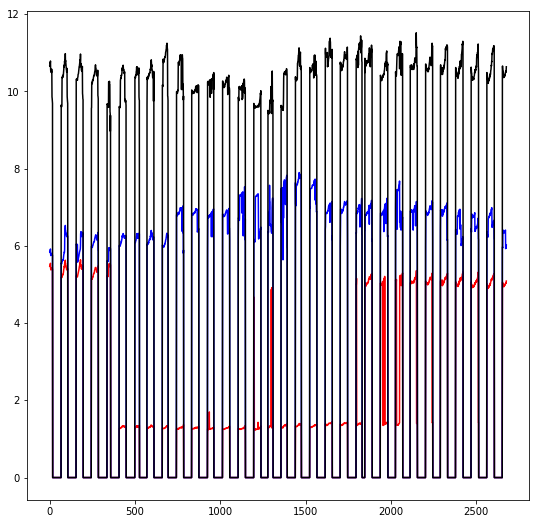

In [16]:
plt.figure(figsize=(9,9))
plt.plot( raw["Current Y (A)"], label="Iy",color = 'red')
plt.plot( raw["Current B (A)"], label="Ib",color= 'blue')
plt.plot( raw["Current R (A)"], label="Ir",color= 'black')
plt.show()

In [19]:
correlated_features = set()  
correlation_matrix = raw.corr()  
for i in range(len(correlation_matrix .columns)):  
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.55:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)


In [20]:
correlated_features

{'Apparent Power kVA',
 'B Phase kW',
 'Current B (A)',
 'Current Day kVAh',
 'Current R (A)',
 'Current Y (A)',
 'MD kVA',
 'MD kW',
 'R Phase kW',
 'Total Active Energy',
 'Total Apparent Energy',
 'Voltage B (V)',
 'Voltage Y (V)',
 'Y Phase kW'}

In [ ]:
'Active Power kW', 'Apparent Power kVA',
       'Current R (A)', 'Current Y (A)', 'Current B (A)', 'Voltage R (V)',
       'Voltage Y (V)', 'Voltage B (V)', 'Total PF', 'Frequency (Hz)',
       'MD kVA', 'MD kW', 'Load Relay Status R', 'Load Relay Status Y',
       'Load Relay Status B', 'R Phase kW', 'Y Phase kW', 'B Phase kW',
       'Active Mode', 'Total Active Energy', 'Total Apparent Energy',
       'Current Day kWh', 'Current Day kVAh', 'Power On Time(Hrs)',
       'Relay on Time(Hrs)', 'Current Day Meter on Period',
       'Current Day Relay on Period

In [21]:
drop = raw.drop(['Current Day kWh','Current Day kVAh','Active Power kW','B Phase kW','Current Day kWh',], axis=1)

In [22]:
drop_corr = drop.corr()

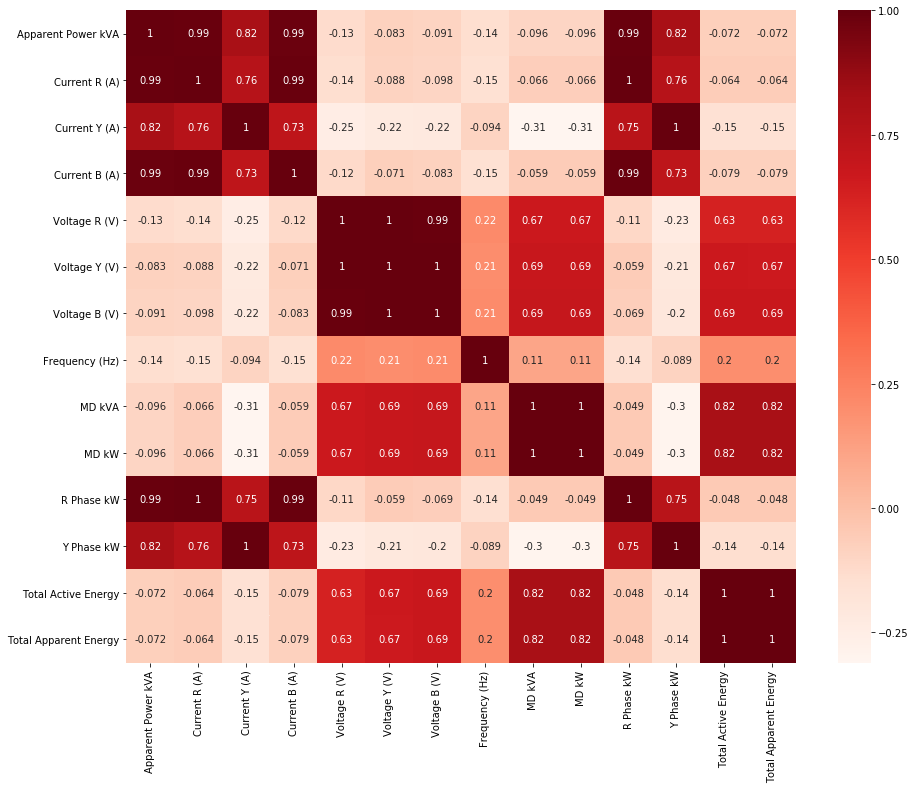

In [23]:
plt.figure(figsize=(15,12))
sns.heatmap(drop_corr,annot=True, cmap=plt.cm.Reds)
plt.show()

In [24]:
drop.head()

,CCMS ID,Timestamp,Apparent Power kVA,Current R (A),Current Y (A),Current B (A),Voltage R (V),Voltage Y (V),Voltage B (V),Total PF,...,Load Relay Status B,R Phase kW,Y Phase kW,Active Mode,Total Active Energy,Total Apparent Energy,Power On Time(Hrs),Relay on Time(Hrs),Current Day Meter on Period,Current Day Relay on Period
0,SMR03-0219-0252,2019-05-01 23:44:42,5.15,10.66,5.47,5.85,233.48,234.57,235.40,0.992 Ld,...,CONNECTED,2.48,1.27,AUTO,7329.234,7372.664,1615:42:7,791:3:44,22:47:44,9:38:30
1,SMR03-0219-0252,2019-05-01 23:29:04,5.14,10.65,5.48,5.83,233.56,234.34,235.45,0.992 Ld,...,CONNECTED,2.48,1.27,AUTO,7327.901,7371.322,1615:26:31,790:48:8,22:32:8,9:22:54
2,SMR03-0219-0252,2019-05-01 23:13:58,5.14,10.74,5.52,5.89,231.74,232.72,233.72,0.992 Ld,...,CONNECTED,2.48,1.27,AUTO,7326.616,7370.028,1615:11:25,790:33:2,22:17:2,9:7:48
3,SMR03-0219-0252,2019-05-01 22:57:49,5.16,10.73,5.53,5.90,232.01,233.22,234.14,0.992 Ld,...,CONNECTED,2.48,1.27,AUTO,7325.238,7368.641,1614:55:17,790:16:54,22:0:54,8:51:40
4,SMR03-0219-0252,2019-05-01 22:42:12,5.22,10.79,5.55,5.92,233.17,234.27,235.16,0.989 Ld,...,CONNECTED,2.51,1.29,AUTO,7323.899,7367.293,1614:39:41,790:1:18,21:45:18,8:36:4


In [72]:
drop['Apparent Power kVA'] = drop['Apparent Power kVA'].astype('float64') 

In [25]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,x_test = train_test_split(drop,test_size=0.15, random_state=42)

In [42]:
X_train['Current R (A)'].astype('float64')
X_train['Current Y (A)'].astype('float64')
X_train['Apparent Power kVA'].astype('float64')
X_train['MD kVA'].astype('float64')
X_train['MD kW'].astype('float64')
X_train['Current B (A)'].astype('float64')
X_train['Current R (A)'].astype('float64')
X_train['Current Y (A)'].astype('float64')


1588    0.00
1192    0.00
929     1.25
1044    1.29
532     0.00
237     0.00
1706    1.36
1535    1.30
109     0.00
1486    0.00
801     0.00
1650    1.41
163     5.22
1674    0.00
990     0.00
252     5.19
2457    0.00
2513    1.43
1339    0.00
2098    0.00
755     1.27
1253    0.00
2587    5.11
528     0.00
2441    0.00
471     0.00
2113    5.02
2178    0.00
632     0.00
2218    5.03
        ... 
975     0.00
2047    1.40
2558    0.00
1082    0.00
474     0.00
747     1.26
2300    4.98
21      0.00
459     0.00
1184    0.00
2324    5.21
955     1.28
1215    1.25
2433    0.00
1515    0.00
2391    4.97
769     1.30
1685    0.00
130     0.00
2135    5.11
1482    0.00
330     0.00
1238    0.00
466     0.00
2169    0.00
1638    1.41
1095    0.00
1130    1.27
1294    1.33
860     1.30
Name: Current Y (A), Length: 2275, dtype: float64

In [43]:
x_test['Current R (A)'].astype('float64')
x_test['Current Y (A)'].astype('float64')
x_test['Apparent Power kVA'].astype('float64')
x_test['MD kVA'].astype('float64')
x_test['MD kW'].astype('float64')
x_test['Current B (A)'].astype('float64')
x_test['Current R (A)'].astype('float64')
x_test['Current Y (A)'].astype('float64')

840     1.26
2233    5.16
443     1.31
836     1.26
2588    5.13
1068    0.00
2125    5.05
1978    1.43
2180    0.00
1399    0.00
435     1.34
2321    5.17
188     5.40
2286    0.00
457     0.00
1731    1.40
1965    1.39
93      5.54
479     0.00
764     1.29
1845    0.00
2291    5.10
2316    5.16
765     1.30
254     5.23
676     1.29
1830    1.47
2484    4.96
907     0.00
332     0.00
        ... 
1178    0.00
460     0.00
1657    0.00
420     1.30
772     1.29
518     1.31
1576    0.00
1872    5.18
1208    1.24
679     1.30
1948    5.01
1195    0.00
1457    1.36
450     0.00
1723    1.40
2663    4.97
2660    4.98
30      0.00
402     0.00
1061    0.00
2520    0.00
1726    1.41
1932    0.00
2569    4.91
1795    0.00
67      5.19
1488    0.00
1569    0.00
1622    1.36
1494    0.00
Name: Current Y (A), Length: 402, dtype: float64

In [99]:
X1_train.reindex()

,Apparent Power kVA,Current B (A),Current R (A),Current Y (A),MD kVA,MD kW,R Phase kW,Total Active Energy,Total Apparent Energy,Voltage B (V),Voltage Y (V),Y Phase kW
1588,0.00,0.00,0.00,0.00,5.35,5.32,0.00,6435.140,6472.285,242.60,243.09,0.00
1192,0.00,0.00,0.00,0.00,5.35,5.32,0.00,6656.100,6694.682,255.48,254.47,0.00
929,4.61,6.73,10.19,1.25,5.35,5.32,2.56,6800.038,6839.644,255.37,254.92,0.31
1044,4.33,6.33,9.98,1.29,5.35,5.32,2.44,6718.081,6757.100,247.41,247.29,0.31
532,0.00,0.00,0.00,0.00,5.35,5.32,0.00,6997.695,7038.660,244.03,243.96,0.00
237,0.00,0.00,0.00,0.00,5.35,5.32,0.00,7202.506,7245.008,251.45,250.59,0.00
1706,4.45,6.89,10.62,1.36,5.35,5.32,2.49,6383.462,6420.319,235.17,236.13,0.31
1535,4.75,7.49,10.54,1.30,5.35,5.32,2.58,6473.039,6510.391,245.04,246.06,0.31
109,0.00,0.00,0.00,0.00,5.35,5.32,0.00,7256.423,7299.313,242.97,242.77,0.00
1486,0.00,0.00,0.00,0.00,5.35,5.32,0.00,6486.699,6524.129,241.32,241.54,0.00


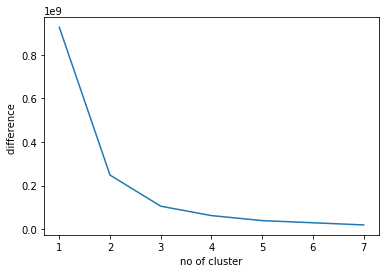

In [112]:
'''from sklearn.cluster import KMeans
errors=[]
k_value=[1,2,3,4,5,7]
for i in k_value:
    kmeans = KMeans(n_clusters=i, random_state=0, n_jobs=-1)
    kmeans.fit(X1_train)
    errors.append(kmeans.inertia_)
plt.plot(k_value, errors)
plt.xlabel('no of cluster')
plt.ylabel('difference ')
plt.show()'''

In [113]:
pred=kmeans.predict(X1_test)

In [115]:
y_means = kmeans.fit_predict(X1_train)

In [191]:
y_means1=y_means
y_means1=y_means+1
# New Dataframe called cluster
cluster = pd.DataFrame(y_means1)
# Adding cluster to the Dataset1
X1_train['cluster'] = cluster
#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(X1_train.groupby('cluster').mean(),1))
kmeans_mean_cluster

/home/xerxes/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Apparent Power kVA,Current B (A),Current R (A),Current Y (A),MD kVA,MD kW,R Phase kW,Total Active Energy,Total Apparent Energy,Voltage B (V),Voltage Y (V),Y Phase kW
cluster,,,,,,,,,,,,
1.0,2.1,2.9,4.5,1.4,4.4,4.4,1.1,6679.8,6718.7,240.7,240.7,0.3
2.0,2.1,3.0,4.7,1.2,4.5,4.5,1.1,6675.4,6714.2,240.7,240.7,0.3
3.0,2.1,3.1,4.8,1.1,4.6,4.6,1.1,6659.6,6698.3,240.7,240.8,0.3
4.0,2.1,3.1,4.8,1.1,4.7,4.7,1.1,6683.8,6722.7,240.7,240.8,0.3
5.0,2.0,2.9,4.5,1.1,4.6,4.5,1.1,6680.9,6719.8,241.1,241.1,0.3
6.0,2.0,2.9,4.5,1.1,4.5,4.5,1.1,6666.8,6705.6,241.1,241.1,0.2
7.0,2.1,3.0,4.7,1.2,4.5,4.5,1.1,6707.3,6746.4,240.9,240.9,0.3


In [104]:
plt.scatter(kmeans_mean_cluster,X1_train[])

[19146360.07246402]

In [45]:
drop['label'] = ''

In [49]:
#drop['MD kVA'] = drop['MD kVA'].astype('float')
i=0
while(i<2675):
    if(drop['MD kVA'][i]>2.8):
         drop['label'][i] =0
        
    else:
         drop['label'][i] =1
    i=i+1

/home/xerxes/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/xerxes/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [91]:
drop

,CCMS ID,Timestamp,Apparent Power kVA,Current R (A),Current Y (A),Current B (A),Voltage R (V),Voltage Y (V),Voltage B (V),Total PF,...,R Phase kW,Y Phase kW,Active Mode,Total Active Energy,Total Apparent Energy,Power On Time(Hrs),Relay on Time(Hrs),Current Day Meter on Period,Current Day Relay on Period,label
0,SMR03-0219-0252,2019-05-01 23:44:42,5.15,10.66,5.47,5.85,233.48,234.57,235.40,0.992 Ld,...,2.48,1.27,AUTO,7329.234,7372.664,1615:42:7,791:3:44,22:47:44,9:38:30,0
1,SMR03-0219-0252,2019-05-01 23:29:04,5.14,10.65,5.48,5.83,233.56,234.34,235.45,0.992 Ld,...,2.48,1.27,AUTO,7327.901,7371.322,1615:26:31,790:48:8,22:32:8,9:22:54,0
2,SMR03-0219-0252,2019-05-01 23:13:58,5.14,10.74,5.52,5.89,231.74,232.72,233.72,0.992 Ld,...,2.48,1.27,AUTO,7326.616,7370.028,1615:11:25,790:33:2,22:17:2,9:7:48,0
3,SMR03-0219-0252,2019-05-01 22:57:49,5.16,10.73,5.53,5.90,232.01,233.22,234.14,0.992 Ld,...,2.48,1.27,AUTO,7325.238,7368.641,1614:55:17,790:16:54,22:0:54,8:51:40,0
4,SMR03-0219-0252,2019-05-01 22:42:12,5.22,10.79,5.55,5.92,233.17,234.27,235.16,0.989 Ld,...,2.51,1.29,AUTO,7323.899,7367.293,1614:39:41,790:1:18,21:45:18,8:36:4,0
5,SMR03-0219-0252,2019-05-01 21:56:21,5.14,10.57,5.42,5.79,235.42,236.27,237.33,0.991 Ld,...,2.48,1.26,AUTO,7322.382,7365.765,1614:21:47,789:43:24,21:27:24,8:18:10,0
6,SMR03-0219-0252,2019-05-01 21:40:43,5.15,10.51,5.38,5.75,237.15,238.32,239.24,0.992 Ld,...,2.48,1.27,AUTO,7321.050,7364.424,1614:6:10,789:27:47,21:11:48,8:2:34,0
7,SMR03-0219-0252,2019-05-01 21:25:06,5.14,10.52,5.41,5.78,235.95,237.13,237.72,0.991 Ld,...,2.47,1.27,AUTO,7319.720,7363.084,1613:50:34,789:12:11,20:56:12,7:46:58,0
8,SMR03-0219-0252,2019-05-01 21:09:28,5.15,10.55,5.40,5.78,236.11,237.31,237.91,0.991 Ld,...,2.48,1.27,AUTO,7318.390,7361.745,1613:34:57,788:56:34,20:40:34,7:31:20,0
9,SMR03-0219-0252,2019-05-01 20:53:51,5.14,10.54,5.42,5.80,235.49,237.19,237.84,0.991 Ld,...,2.47,1.27,AUTO,7317.059,7360.405,1613:19:21,788:40:58,20:24:58,7:15:44,0


In [186]:
x=drop[['Apparent Power kVA',
 'Current B (A)',
 'Current R (A)',
 'Current Y (A)',
 'MD kVA',
 'MD kW',
 'R Phase kW',
 'Total Active Energy',
 'Total Apparent Energy',
 'Voltage B (V)',
 'Voltage Y (V)',
 'Y Phase kW']]


In [179]:
x

,Apparent Power kVA,Current B (A),Current R (A),Current Y (A),MD kVA,MD kW,R Phase kW,Total Active Energy,Total Apparent Energy,Voltage B (V),Voltage Y (V),Y Phase kW
0,5.15,5.85,10.66,5.47,5.20,5.16,2.48,7329.234,7372.664,235.40,234.57,1.27
1,5.14,5.83,10.65,5.48,5.20,5.16,2.48,7327.901,7371.322,235.45,234.34,1.27
2,5.14,5.89,10.74,5.52,5.20,5.16,2.48,7326.616,7370.028,233.72,232.72,1.27
3,5.16,5.90,10.73,5.53,5.20,5.16,2.48,7325.238,7368.641,234.14,233.22,1.27
4,5.22,5.92,10.79,5.55,5.20,5.16,2.51,7323.899,7367.293,235.16,234.27,1.29
5,5.14,5.79,10.57,5.42,5.20,5.16,2.48,7322.382,7365.765,237.33,236.27,1.26
6,5.15,5.75,10.51,5.38,5.20,5.16,2.48,7321.050,7364.424,239.24,238.32,1.27
7,5.14,5.78,10.52,5.41,5.20,5.16,2.47,7319.720,7363.084,237.72,237.13,1.27
8,5.15,5.78,10.55,5.40,5.20,5.16,2.48,7318.390,7361.745,237.91,237.31,1.27
9,5.14,5.80,10.54,5.42,5.20,5.16,2.47,7317.059,7360.405,237.84,237.19,1.27


In [154]:
X = x.as_matrix()

/home/xerxes/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [187]:
x

,Apparent Power kVA,Current B (A),Current R (A),Current Y (A),MD kVA,MD kW,R Phase kW,Total Active Energy,Total Apparent Energy,Voltage B (V),Voltage Y (V),Y Phase kW
0,5.15,5.85,10.66,5.47,5.20,5.16,2.48,7329.234,7372.664,235.40,234.57,1.27
1,5.14,5.83,10.65,5.48,5.20,5.16,2.48,7327.901,7371.322,235.45,234.34,1.27
2,5.14,5.89,10.74,5.52,5.20,5.16,2.48,7326.616,7370.028,233.72,232.72,1.27
3,5.16,5.90,10.73,5.53,5.20,5.16,2.48,7325.238,7368.641,234.14,233.22,1.27
4,5.22,5.92,10.79,5.55,5.20,5.16,2.51,7323.899,7367.293,235.16,234.27,1.29
5,5.14,5.79,10.57,5.42,5.20,5.16,2.48,7322.382,7365.765,237.33,236.27,1.26
6,5.15,5.75,10.51,5.38,5.20,5.16,2.48,7321.050,7364.424,239.24,238.32,1.27
7,5.14,5.78,10.52,5.41,5.20,5.16,2.47,7319.720,7363.084,237.72,237.13,1.27
8,5.15,5.78,10.55,5.40,5.20,5.16,2.48,7318.390,7361.745,237.91,237.31,1.27
9,5.14,5.80,10.54,5.42,5.20,5.16,2.47,7317.059,7360.405,237.84,237.19,1.27


In [188]:
y = []

In [189]:
y = drop['label']

In [147]:
np.array(y)

array([0, 0, 0, ..., 1, '', ''], dtype=object)

In [190]:
X1_train, X1_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [89]:
'''parametersx=[{'C': [10**-4, 10**-2,0.75, 0.79, 0.80,0.81, 1, 5, 10, 20, 50, 10**2, 10**4]}]
clf = GridSearchCV(LogisticRegression(penalty='l2'), parametersx, cv=4, scoring='roc_auc', )
clf.fit(X1_train, y_train)
pred=clf.predict_proba(X1_test)[:, 1]
print(clf.best_estimator_)
print(clf.score(X1_train, y_train))
print(clf.score(X1_test, y_test))'''

/home/xerxes/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/xerxes/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: Unknown label type: 'unknown'

In [39]:
raw1.describe()

,KWh,KVAh,Vr (Volt),Vy (Volt),Vb (Volt),Ir (Amp),Iy (Amp),Ib (Amp),Freq (Hz),Total Load
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,7.420000e+02
mean,2.139387,2.153534,237.755997,238.030809,237.909528,4.842399,1.377022,3.071887,49.792224,5.170000e+00
std,2.296270,2.311301,19.318425,19.565254,19.738607,5.106522,1.926937,3.263343,3.669756,4.799399e-14
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.170000e+00
25%,0.000000,0.000000,232.207500,231.635000,231.287500,0.000000,0.000000,0.000000,50.020000,5.170000e+00
50%,0.480000,0.484000,238.160000,238.745000,238.730000,1.250000,0.000000,0.610000,50.060000,5.170000e+00
75%,4.493000,4.520000,245.915000,246.675000,246.747500,10.450000,1.380000,6.535000,50.090000,5.170000e+00
max,5.453000,5.489000,256.620000,258.330000,258.870000,11.430000,5.680000,7.890000,51.510000,5.170000e+00


In [158]:
len(X)

2677

In [162]:
X = x.as_matrix()

/home/xerxes/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [165]:
Y= drop['label'].as_matrix()

/home/xerxes/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [167]:
X1_train, X1_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

In [184]:
X

array([[  5.15,   5.85,  10.66, ..., 235.4 , 234.57,   1.27],
       [  5.14,   5.83,  10.65, ..., 235.45, 234.34,   1.27],
       [  5.14,   5.89,  10.74, ..., 233.72, 232.72,   1.27],
       ...,
       [  5.06,   5.94,  10.5 , ..., 235.19, 235.7 ,   1.17],
       [  5.06,   5.97,  10.54, ..., 234.38, 234.65,   1.17],
       [  5.06,   6.02,  10.64, ..., 232.14, 232.77,   1.17]])

In [137]:
y = pd.to_numeric(y)

In [124]:
import tpot